In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# 灰度图转特征相应图
# img_c = cv2.applyColorMap(img, cv2.COLORMAP_JET)

In [2]:
config_file = './configs/vg/ggnn+gs/gggs_faster_rcnn_r50_fpn_sample1e-3_mstrain_1x_vg1000_attr.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = './exps/vg/gggsr50_attr_new/latest.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [10]:
# test a singl image
img = 'demo/img.png'
import cv2
result = inference_detector(model, img)


In [11]:
img = cv2.imread(img)
for each in result:
    if len(each):
        for bbox in each:
            if bbox[-1]<0.3:
                continue

            rect = bbox
            img = cv2.rectangle(img,(int(rect[0]), int(rect[1])), (int(rect[2]), int(rect[3])),(0,255,0), 2)
cv2.imwrite("infer.jpg",img)

True

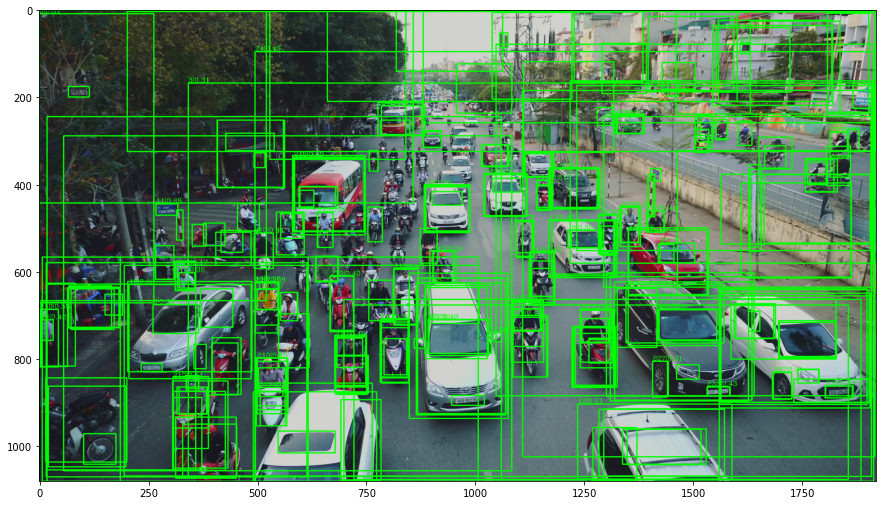

In [6]:
# show the results
# print(result)
show_result_pyplot(model, img, result)
# print(result)